<a href="https://colab.research.google.com/github/cunhamaicon/churn_modelling_deepaz/blob/master/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn Modelling

---


**Autor: Maicon Henrique Cunha**

**email: maiconhenrique@hotmail.com**

**Github: [https://github.com/cunhamaicon](https://github.com/cunhamaicon/)**


---

Nesse trabalho trataremos de um problema de churn que consiste em investigar e criar um modelo para identificar  usuários de um banco fictício que estão deixando de ser correntistas.
<br><br>

Três abordagens distintas serão realizadas:


1.   Investigação utilizando gráficos
2.   Investigação e modelagem utilizando regressão logística
3. Modelagem utilizando redes neurais


O banco de dados ficitício utlizado para esse projeto originalmente encontra-se [aqui](https://www.superdatascience.com/pages/deep-learning).
<br><br>
 Esse tipo de problema é muito comum em qualquer área e a abordagem utilizada aqui é geral.
<br><br>
Todo o código foi feito no Colab e pode ser executado on-line em [https://colab.research.google.com/](https://colab.research.google.com/). 




# Abordagem1: visualizando graficamente informações sobre o banco

## Informações iniciais

Conferindo o número total de usuários do banco e aqueles que deixaram de ser correntistas:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/usuarios.jpg?raw=true)

## Usuários que deixaram o banco por variável:

### Gênero

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/genero.jpg?raw=true)

Em números e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/genero_abs.jpg?raw=true)

###País:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/geografia.jpg?raw=true)

Em números e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/geografia_abs.jpg?raw=true)

### Usuários com cartão

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/cartao.jpg?raw=true)

Em números absolutos e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/cartao_abs.jpg?raw=true)



###Usuários ativos

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/ativo.jpg?raw=true)

Em números absolutos e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/ativo_abs.jpg?raw=true)

###Número de produtos

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/num_produtos.jpg?raw=true)

Em números absolutos e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/num_produtos._abs.jpg?raw=true)

### Score

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/score.jpg?raw=true)

###Idade

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/idade.jpg?raw=true)

Em números absolutos e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/idade_abs.jpg?raw=true)

### Balanço

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/balanco.jpg?raw=true)

Em números absolutos e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/balanco_abs.jpg?raw=true)

### Salário estimado

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/salario.jpg?raw=true)

Em números absolutos e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/salario_abs.jpg?raw=true)

### Tempo de permanência

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/permanencia.jpg?raw=true)

Em números absolutos e com aplicação do teste chi-quadrado temos:

![alt text](https://github.com/cunhamaicon/churn_modelling_deepaz/blob/master/img/permanencia_abs.jpg?raw=true)

## Observações:






1.   Olhando graficamente e a partir do teste chi-quadrado é possível eliminar algumas variáveis da análise, são elas: "Usuários com cartão", "Score" e "Salário estimado".
2.   Aparentemente as variáveis "País", "Gênero" e "Usuário Ativo" possuem grande relevância no problema. Os usuários da Alemanha permaneceram mais no banco que os de outros países, assim como os usuários do sexo masculino permaneceram mais no banco que os usuários do sexo feminino e os membros ativos possuem uma chance maior de permanecer no banco.
3. É de se esperar que a medida que o número de produtos de um cliente em um banco seja maior, sua chance de permanecer correntista seja maior também, o que não aconteceu, por isso a variável "Número de produtos" deve ser investigada.
4. É de se esperar que a medida que o tempo de permanência de um cliente em um banco seja maior, sua chance de permanecer correntista seja maior também, o que não aconteceu, por isso a variável "Tempo de permanência" deve ser investigada.
5. Utilizando regressão logística será possível medir o impacto dessas variáveis observadas no modelo e assim ordenar quais possuem mais ou menos importância e devem ser levadas em consideração em um intervenção real.



# Abordagem 2: regressão logística

## Procedimentos iniciais

### Clone da pasta

In [1]:
!git clone https://github.com/cunhamaicon/churn_modelling_deepaz

Cloning into 'churn_modelling_deepaz'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 2), reused 30 (delta 2), pack-reused 0
Unpacking objects: 100% (32/32), done.


Visualizando as informações da pasta clonada:

In [2]:
 ls churn_modelling_deepaz

Churn_Modelling.csv  churn_modelling.ipynb  img/


### Importação de pacotes

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm

### Criação do dataset

In [0]:
datadir='churn_modelling_deepaz'
dataset = pd.read_csv(os.path.join(datadir, "Churn_Modelling.csv"))
pd.set_option('display.max_colwidth',-1)

Visualizando o cabeçalho do banco:

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Visualizando informações do banco:

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Como podemos observar se trata de um banco com dez mil usuários onde todas as entradas são não nulas

### Tratamento do banco

Exluindo colunas que não serão utilizadas:

In [0]:
dataset = dataset.drop(columns = ['RowNumber','CustomerId','Surname'])

In [8]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Criando dummies das variáveis categóricas "Geography" e "Gender":

In [9]:
dataset = pd.get_dummies(dataset, columns =['Geography','Gender'], drop_first=True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Reordenando as colunas do dataset:

In [0]:
cols = list(dataset.columns.values)

In [11]:
cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [0]:
dataset = dataset[
  ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male',
  'Exited']]

In [13]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0


## Regressão Logística

Separando as entradas e saídas:

In [0]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Otimizando as variáveis da regressão logística:

In [17]:

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.438017
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.133      
Dependent Variable: y                AIC:              8782.3346  
Date:               2019-05-19 12:27 BIC:              8861.6483  
No. Observations:   10000            Log-Likelihood:   -4380.2    
Df Model:           10               LL-Null:          -5054.9    
Df Residuals:       9989             LLR p-value:      8.1277e-284
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        -0.0036     0.0002   -18.8820   0.0000   -0.0040   -0.0032
x2         0.0586     0.0023    25.0409   0.0

Eliminando variáveis sem importância:

In [18]:
dataset.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Exited'],
      dtype='object')

In [19]:
dataset.columns[[0,1,2,4,5,6,8,10]]

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Geography_Germany', 'Gender_Male'],
      dtype='object')

In [20]:
X = X[:,[0,1,2,4,5,6,8,10]]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.438375
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.133      
Dependent Variable: y                AIC:              8783.4936  
Date:               2019-05-19 12:28 BIC:              8841.1763  
No. Observations:   10000            Log-Likelihood:   -4383.7    
Df Model:           7                LL-Null:          -5054.9    
Df Residuals:       9992             LLR p-value:      1.1823e-285
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1    -0.0036      0.0002    -20.1571    0.0000    -0.0039    -0.0032
x2     0.0586      0.0023     25.2418    

Separando treinamento e teste:

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 0)

Treinando a regressão logística nas variáveis selecionadas:

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

### Acurácia

Veirificando a acurácia da regressão logística no conjunto de testes:

In [23]:
y_pred = logreg.predict(X_test)
print('Acurácia da regressão logística no conjunto de teste: {:.2f}'.format(logreg.score(X_test, y_test)))

Acurácia da regressão logística no conjunto de teste: 0.82


### Curva ROC 

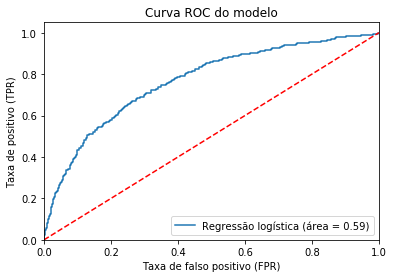

In [24]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Regressão logística (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo (FPR)')
plt.ylabel('Taxa de positivo (TPR)')
plt.title('Curva ROC do modelo')
plt.legend(loc="lower right")
plt.show()

### Matriz de confusão

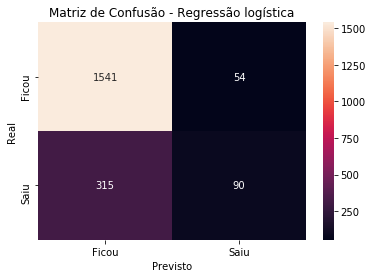

In [25]:
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')

ax.set_xlabel('Previsto');ax.set_ylabel('Real'); 
ax.set_title('Matriz de Confusão - Regressão logística'); 
ax.xaxis.set_ticklabels(['Ficou', "Saiu"]); ax.yaxis.set_ticklabels(['Ficou',"Saiu"])
plt.show()

### Odds Ratio

In [26]:
print( np.exp(result.params))

[0.99643405 1.06036632 0.96074067 0.69926488 0.82266483 0.34238197
 2.34694413 0.54047279]


In [27]:
dataset.columns[[0,1,2,4,5,6,8,10]].values

array(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Geography_Germany', 'Gender_Male'], dtype=object)

In [0]:
data = {'Variáveis':dataset.columns[[0,1,2,4,5,6,8,10]].values, 'Odds Ratio':np.exp(result.params)} 
df = pd.DataFrame(data)

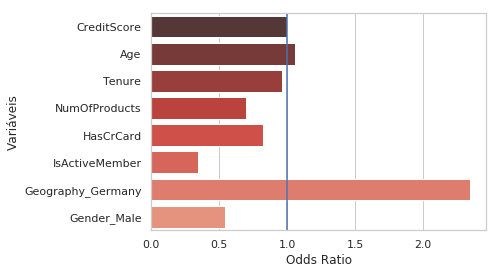

In [29]:
sns.set(style="whitegrid")
ax = sns.barplot(data = df,y="Variáveis", x="Odds Ratio",palette="Reds_d")
plt.axvline(1)
plt.show()

### Observações

1. Como observado graficamente ser usuário da Alemanha aumenta bastante a chance de permanecer no banco
2. Membro ativo, mulher, número de produtos e possuir cartão de crédito são nessa ordem as variáveis que interferem mais na saída do banco
3. Ao contrário das observações gráficas é possível quantificar as variáveis importantes

# Abordagem 3: redes neurais

## ANN - Teste1

Separando dados de treinamento e teste:

In [0]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 0)

Usando o StandardScaler:

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Criando uma rede neural composta por duas camadas intermediárias com seis neurônios em cada camada intermediária e duas camadas dropout intermediárias para evitar overfitting:

In [0]:
classifier1 = Sequential()

classifier1.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier1.add(Dropout(0.1))
classifier1.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier1.add(Dropout(0.1))
classifier1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier1.compile(Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

Visualizando as informações da rede criada:

In [33]:
classifier1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


Treinando o modelo:

In [34]:
history1 = classifier1.fit(X_train, y_train, batch_size = 10, epochs = 30,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 6s 748us/step - loss: 0.4748 - acc: 0.7955 - val_loss: 0.4239 - val_acc: 0.7975
Epoch 2/30
8000/8000 [==============================] - 3s 375us/step - loss: 0.4267 - acc: 0.7960 - val_loss: 0.4213 - val_acc: 0.7975
Epoch 3/30
8000/8000 [==============================] - 3s 379us/step - loss: 0.4243 - acc: 0.8030 - val_loss: 0.4172 - val_acc: 0.8275
Epoch 4/30
8000/8000 [==============================] - 3s 392us/step - loss: 0.4230 - acc: 0.8222 - val_loss: 0.4156 - val_acc: 0.8345
Epoch 5/30
8000/8000 [==============================] - 3s 374us/step - loss: 0.4223 - acc: 0.8247 - val_loss: 0.4150 - val_acc: 0.8375
Epoch 6/30
8000/8000 [==============================] - 3s 373us/step - loss: 0.4210 - acc: 0.8266 - val_loss: 0.4112 - val_acc: 0.8385
Epoch 7/30
8000/8000 [==============================] - 3s 373us/step - loss: 0.4164 - a

### Análise Teste 1

Erro e acurácia nos conjunto de treinamento e validação:

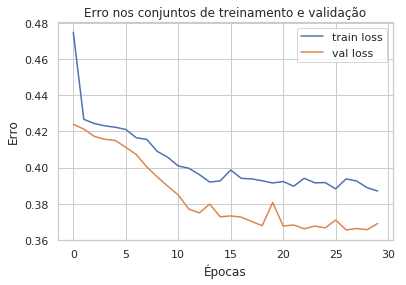

In [35]:
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.title("Erro nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.show()

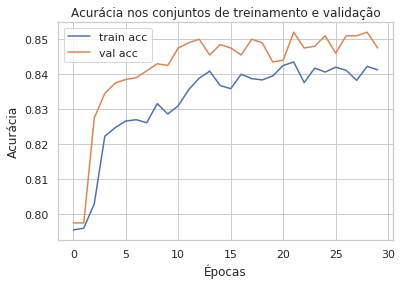

In [36]:
plt.plot(history1.history['acc'], label='train acc')
plt.plot(history1.history['val_acc'], label='val acc')
plt.legend()
plt.title("Acurácia nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.show()

### Curva Roc do modelo:

In [0]:
y_pred = classifier1.predict(X_test)

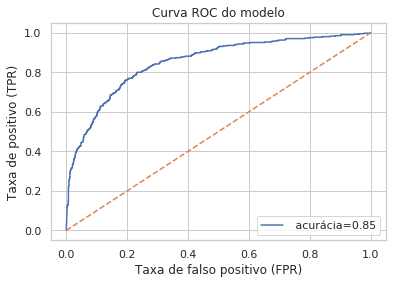

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=" acurácia="+str(auc)[:4])
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taxa de falso positivo (FPR)")
plt.ylabel("Taxa de positivo (TPR)")
plt.title("Curva ROC do modelo")
plt.show()

### Matriz de Confusão

In [0]:
y_pred = (y_pred > 0.5)

In [0]:
cm = confusion_matrix(y_test, y_pred)

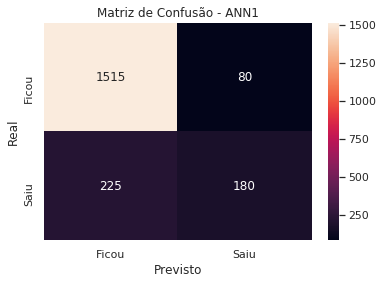

In [41]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')

ax.set_xlabel('Previsto');ax.set_ylabel('Real'); 
ax.set_title('Matriz de Confusão - ANN1'); 
ax.xaxis.set_ticklabels(['Ficou', "Saiu"]); ax.yaxis.set_ticklabels(['Ficou',"Saiu"])
plt.show()

## ANN - Teste2

Craiando um modelo com uma única camada com dez neurônios:

In [0]:
classifier2 = Sequential()
classifier2.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier2.compile(RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

Informações da rede:

In [43]:
print(classifier2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
history2 = classifier2.fit(X_train, y_train, batch_size = 10, epochs = 30,validation_data=(X_test,y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 2s 297us/step - loss: 0.4929 - acc: 0.7955 - val_loss: 0.4241 - val_acc: 0.7975
Epoch 2/30
8000/8000 [==============================] - 2s 283us/step - loss: 0.4208 - acc: 0.8107 - val_loss: 0.4119 - val_acc: 0.8310
Epoch 3/30
8000/8000 [==============================] - 2s 282us/step - loss: 0.4083 - acc: 0.8269 - val_loss: 0.3984 - val_acc: 0.8375
Epoch 4/30
8000/8000 [==============================] - 2s 282us/step - loss: 0.3995 - acc: 0.8279 - val_loss: 0.3927 - val_acc: 0.8375
Epoch 5/30
8000/8000 [==============================] - 2s 283us/step - loss: 0.3927 - acc: 0.8310 - val_loss: 0.3854 - val_acc: 0.8365
Epoch 6/30
8000/8000 [==============================] - 2s 285us/step - loss: 0.3881 - acc: 0.8310 - val_loss: 0.3798 - val_acc: 0.8380
Epoch 7/30
8000/8000 [==============================] - 2s 284us/step - loss: 0.3839 - acc: 0.8325 - val_loss: 0.3761 - val_acc: 0.8330


### Análise Teste 2

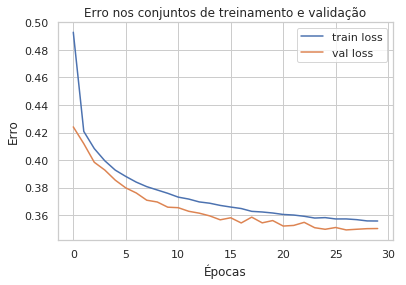

In [46]:
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.title("Erro nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.show()

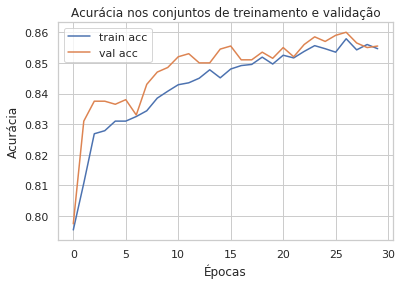

In [47]:
plt.plot(history2.history['acc'], label='train acc')
plt.plot(history2.history['val_acc'], label='val acc')
plt.legend()
plt.title("Acurácia nos conjuntos de treinamento e validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.show()

### Curva roc do modelo:

In [0]:
y_pred = classifier2.predict(X_test)

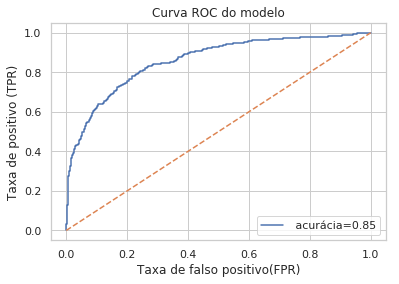

In [49]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=" acurácia="+str(auc)[:4])
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taxa de falso positivo(FPR)")
plt.ylabel("Taxa de positivo (TPR)")
plt.title("Curva ROC do modelo")
plt.show()

### Matriz de confusão

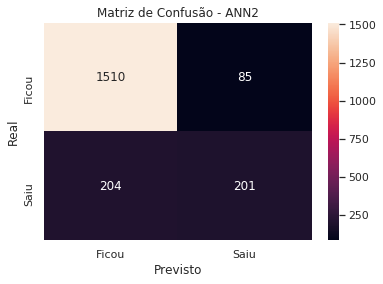

In [50]:
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')

ax.set_xlabel('Previsto');ax.set_ylabel('Real'); 
ax.set_title('Matriz de Confusão - ANN2'); 
ax.xaxis.set_ticklabels(['Ficou', "Saiu"]); ax.yaxis.set_ticklabels(['Ficou',"Saiu"])
plt.show()

## Observações sobre os modelos:



1.  Mesmo com menos parâmetros que a ANN1, a ANN2 se mostrou com maior acurácia.
2. Ambas as redes neurais apresentam desempenho melhor que a regressão logística, o que era esperado.


# Conclusão

Para uma visualização geral do problema, a abordagem gráfica é eficiente.  Porém, se quisermos extrair propriedades das variáveis e ordenar por relevância a regressão logística é mais indicada. Já o modelo com maior acurácia é o utilizando redes neurais e deve ser utilizado para verificar a psosibilidade de um usuário deixar ou não o banco. 